<a href="https://colab.research.google.com/github/ygbgames/predict-car-price/blob/main/car_valuation_eda.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
Analyze the car price prediction dataset located at "https://raw.githubusercontent.com/ygbgames/ml-car-prediction/refs/heads/main/data/vehicles.csv".

## Load the Dataset


In [21]:
import pandas as pd

# Define the URL for the dataset
url = "https://raw.githubusercontent.com/ygbgames/ml-car-prediction/refs/heads/main/data/vehicles.csv"

# Load the dataset from the URL into a DataFrame
df = pd.read_csv(url)

# Display the first 5 rows of the DataFrame
print("First 5 rows of the DataFrame:")
print(df.head())

First 5 rows of the DataFrame:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         NaN    az  
1  

## Data Inspection

In [22]:
print("Displaying the first 5 rows of the DataFrame:")
print(df.head())

print("\nDisplaying concise summary of the DataFrame (df.info()):")
df.info()

print("\nDisplaying descriptive statistics of the DataFrame:")
print(df.describe())

Displaying the first 5 rows of the DataFrame:
           id                  region  price  year manufacturer model  \
0  7222695916                prescott   6000   NaN          NaN   NaN   
1  7218891961            fayetteville  11900   NaN          NaN   NaN   
2  7221797935            florida keys  21000   NaN          NaN   NaN   
3  7222270760  worcester / central MA   1500   NaN          NaN   NaN   
4  7210384030              greensboro   4900   NaN          NaN   NaN   

  condition cylinders fuel  odometer title_status transmission  VIN drive  \
0       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
1       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
2       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
3       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   
4       NaN       NaN  NaN       NaN          NaN          NaN  NaN   NaN   

  size type paint_color state  
0  NaN  NaN         

## Handle Missing Values

### Subtask:
Identify and address missing values in the dataset. This might involve imputation or removal, depending on the extent of missingness.


In [23]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information:")
print(missing_info)

Missing Values Information:
              Missing Count  Missing Percentage
size                 306361           71.767476
cylinders            177678           41.622470
condition            174104           40.785232
VIN                  161042           37.725356
drive                130567           30.586347
paint_color          130203           30.501078
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281


In [24]:
columns_to_drop = ['VIN', 'size', 'drive', 'condition', 'cylinders', 'paint_color']

# Filter columns_to_drop to only include columns that are actually in the DataFrame
existing_columns_to_drop = [col for col in columns_to_drop if col in df.columns]

# Drop only the existing columns
df = df.drop(columns=existing_columns_to_drop)

print(f"Dropped columns: {existing_columns_to_drop}")
print("\nDisplaying concise summary of the DataFrame after dropping columns:")
df.info()

Dropped columns: ['VIN', 'size', 'drive', 'condition', 'cylinders', 'paint_color']

Displaying concise summary of the DataFrame after dropping columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          425675 non-null  float64
 4   manufacturer  409234 non-null  object 
 5   model         421603 non-null  object 
 6   fuel          423867 non-null  object 
 7   odometer      422480 non-null  float64
 8   title_status  418638 non-null  object 
 9   transmission  424324 non-null  object 
 10  type          334022 non-null  object 
 11  state         426880 non-null  object 
dtypes: float64(2), int64(2), object(8)
memory usage: 39.1+ MB


In [25]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_info = pd.DataFrame({
    'Missing Count': missing_values,
    'Missing Percentage': missing_percentage
})

missing_info = missing_info[missing_info['Missing Count'] > 0].sort_values(by='Missing Percentage', ascending=False)

print("Missing Values Information After Dropping Columns:")
print(missing_info)

Missing Values Information After Dropping Columns:
              Missing Count  Missing Percentage
type                  92858           21.752717
manufacturer          17646            4.133714
title_status           8242            1.930753
model                  5277            1.236179
odometer               4400            1.030735
fuel                   3013            0.705819
transmission           2556            0.598763
year                   1205            0.282281


In [26]:
for col in ['type', 'manufacturer', 'title_status', 'model', 'fuel', 'transmission']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].mode()[0])
        print(f"Imputed missing values in '{col}' with its mode.")

for col in ['odometer', 'year']:
    if df[col].isnull().any():
        df[col] = df[col].fillna(df[col].median())
        print(f"Imputed missing values in '{col}' with its median.")

print("\nMissing Values Information After Imputation:")
print(df.isnull().sum())

Imputed missing values in 'type' with its mode.
Imputed missing values in 'manufacturer' with its mode.
Imputed missing values in 'title_status' with its mode.
Imputed missing values in 'model' with its mode.
Imputed missing values in 'fuel' with its mode.
Imputed missing values in 'transmission' with its mode.
Imputed missing values in 'odometer' with its median.
Imputed missing values in 'year' with its median.

Missing Values Information After Imputation:
id              0
region          0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
type            0
state           0
dtype: int64


## Identify and Analyze Categorical Features

### Subtask:
Examine categorical columns, including their unique values and distributions, to understand their impact on car price.


In [27]:
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print("Categorical Columns and their Unique Value Counts:")
for col in categorical_cols:
    print(f"Column '{col}': {df[col].nunique()} unique values")

Categorical Columns and their Unique Value Counts:
Column 'region': 404 unique values
Column 'manufacturer': 42 unique values
Column 'model': 29649 unique values
Column 'fuel': 5 unique values
Column 'title_status': 6 unique values
Column 'transmission': 3 unique values
Column 'type': 13 unique values
Column 'state': 51 unique values


Visualizing Distributions of Numerical Features:


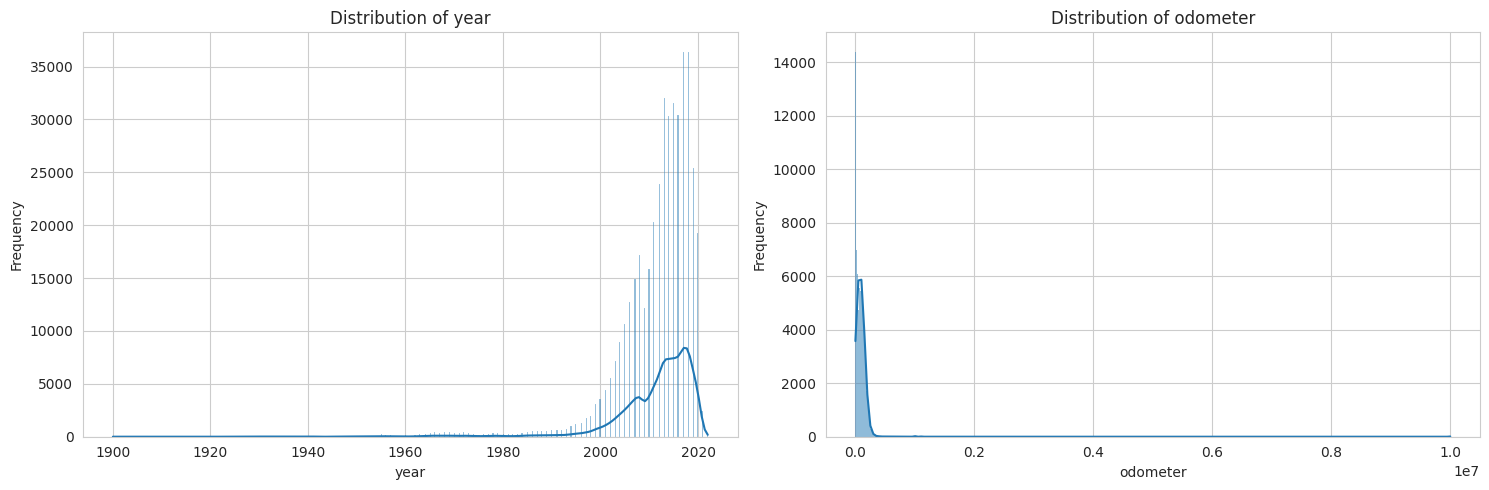

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style for plots
sns.set_style('whitegrid')

print("Visualizing Distributions of Numerical Features:")

numerical_cols = ['year', 'odometer']

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Visualizing Relationship between Numerical Features and Price:


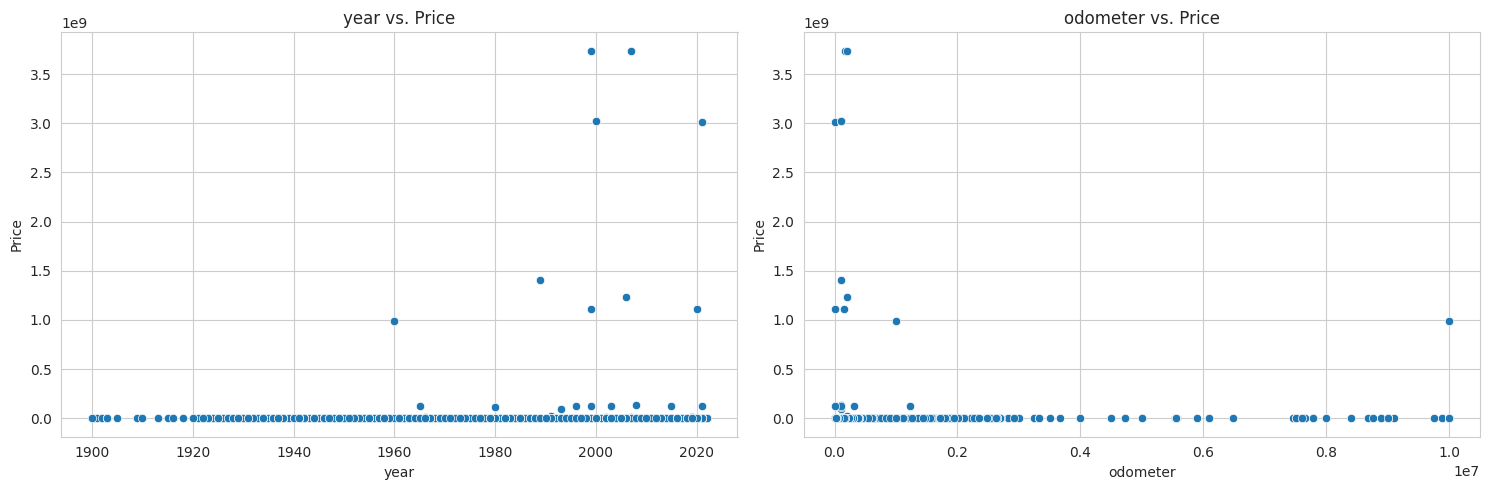

In [31]:
print("Visualizing Relationship between Numerical Features and Price:")

plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['price'])
    plt.title(f'{col} vs. Price')
    plt.xlabel(col)
    plt.ylabel('Price')
plt.tight_layout()
plt.show()

Visualizing Distributions of Lower Cardinality Categorical Features:


/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-2738223794.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is

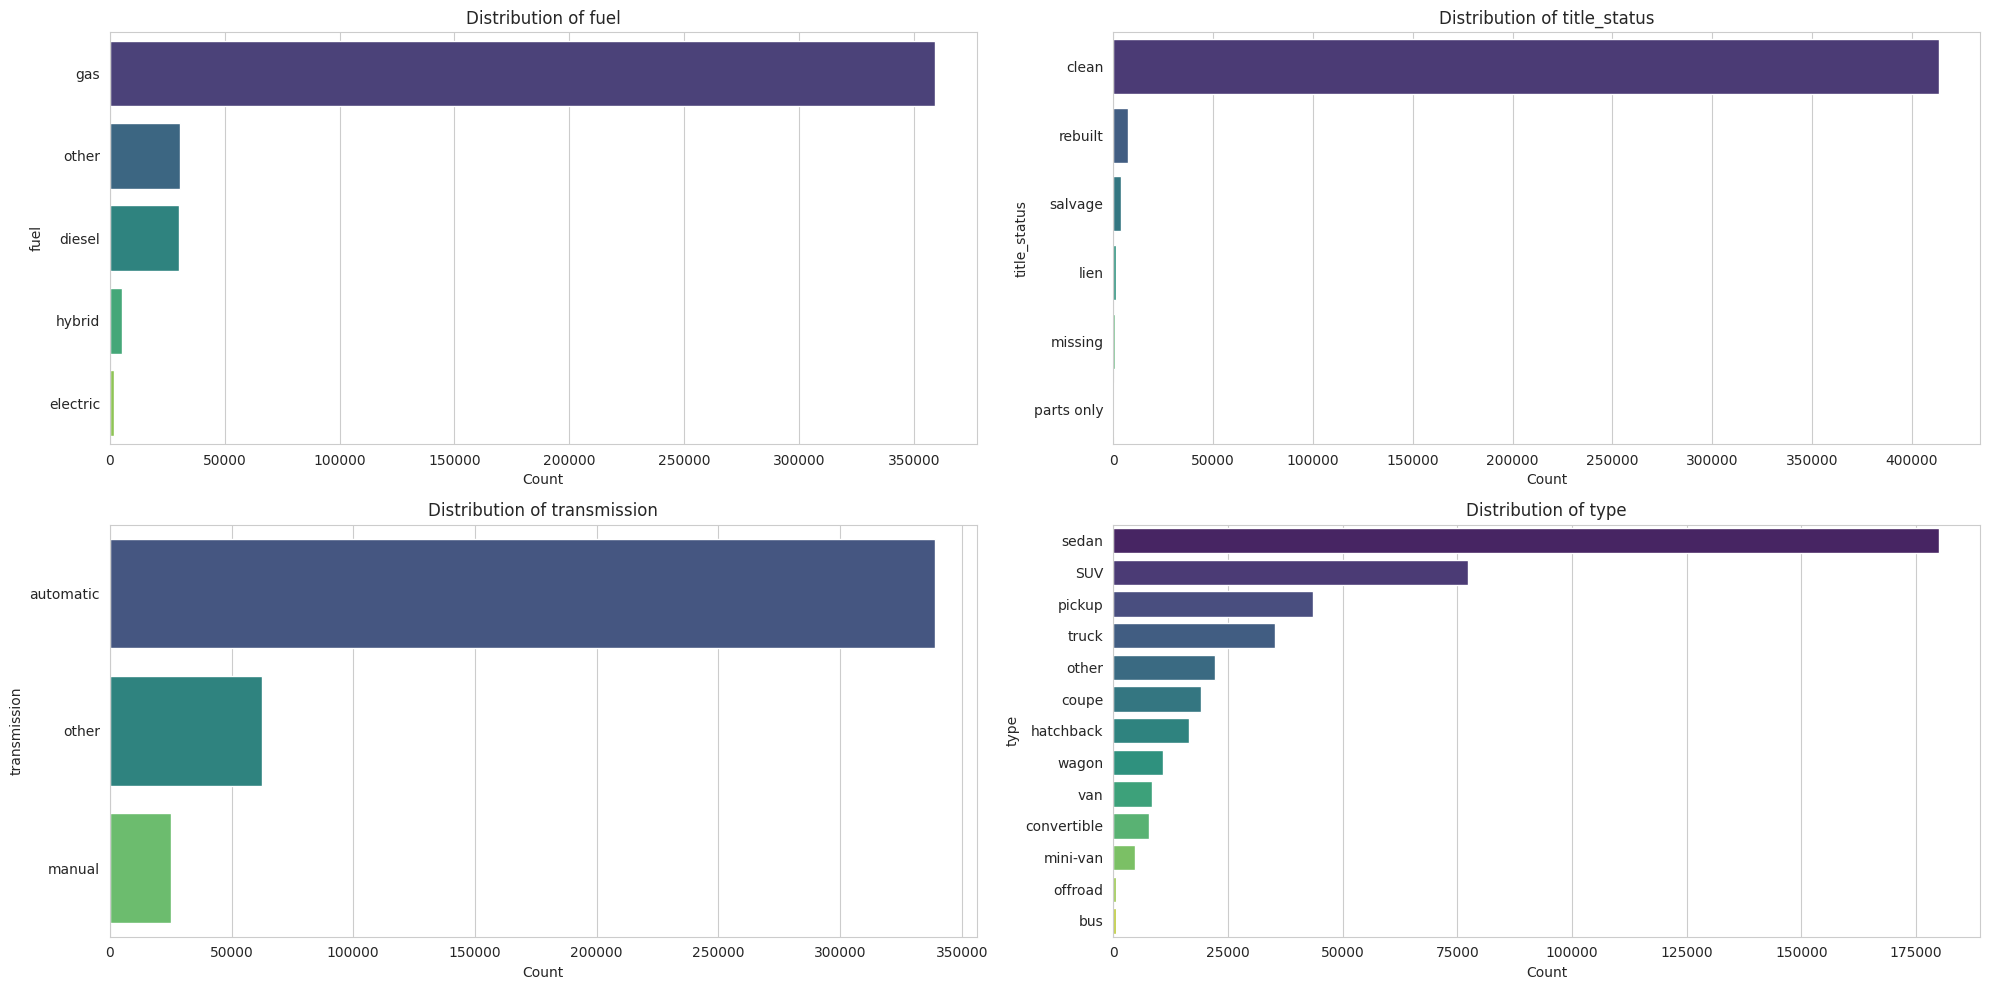

In [32]:
print("Visualizing Distributions of Lower Cardinality Categorical Features:")

categorical_low_cardinality = ['fuel', 'title_status', 'transmission', 'type']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_low_cardinality):
    plt.subplot(2, 2, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Visualizing Relationship between Lower Cardinality Categorical Features and Price:


/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
/tmp/ipython-input-532491783.py:6: FutureWarning: 

Passing `

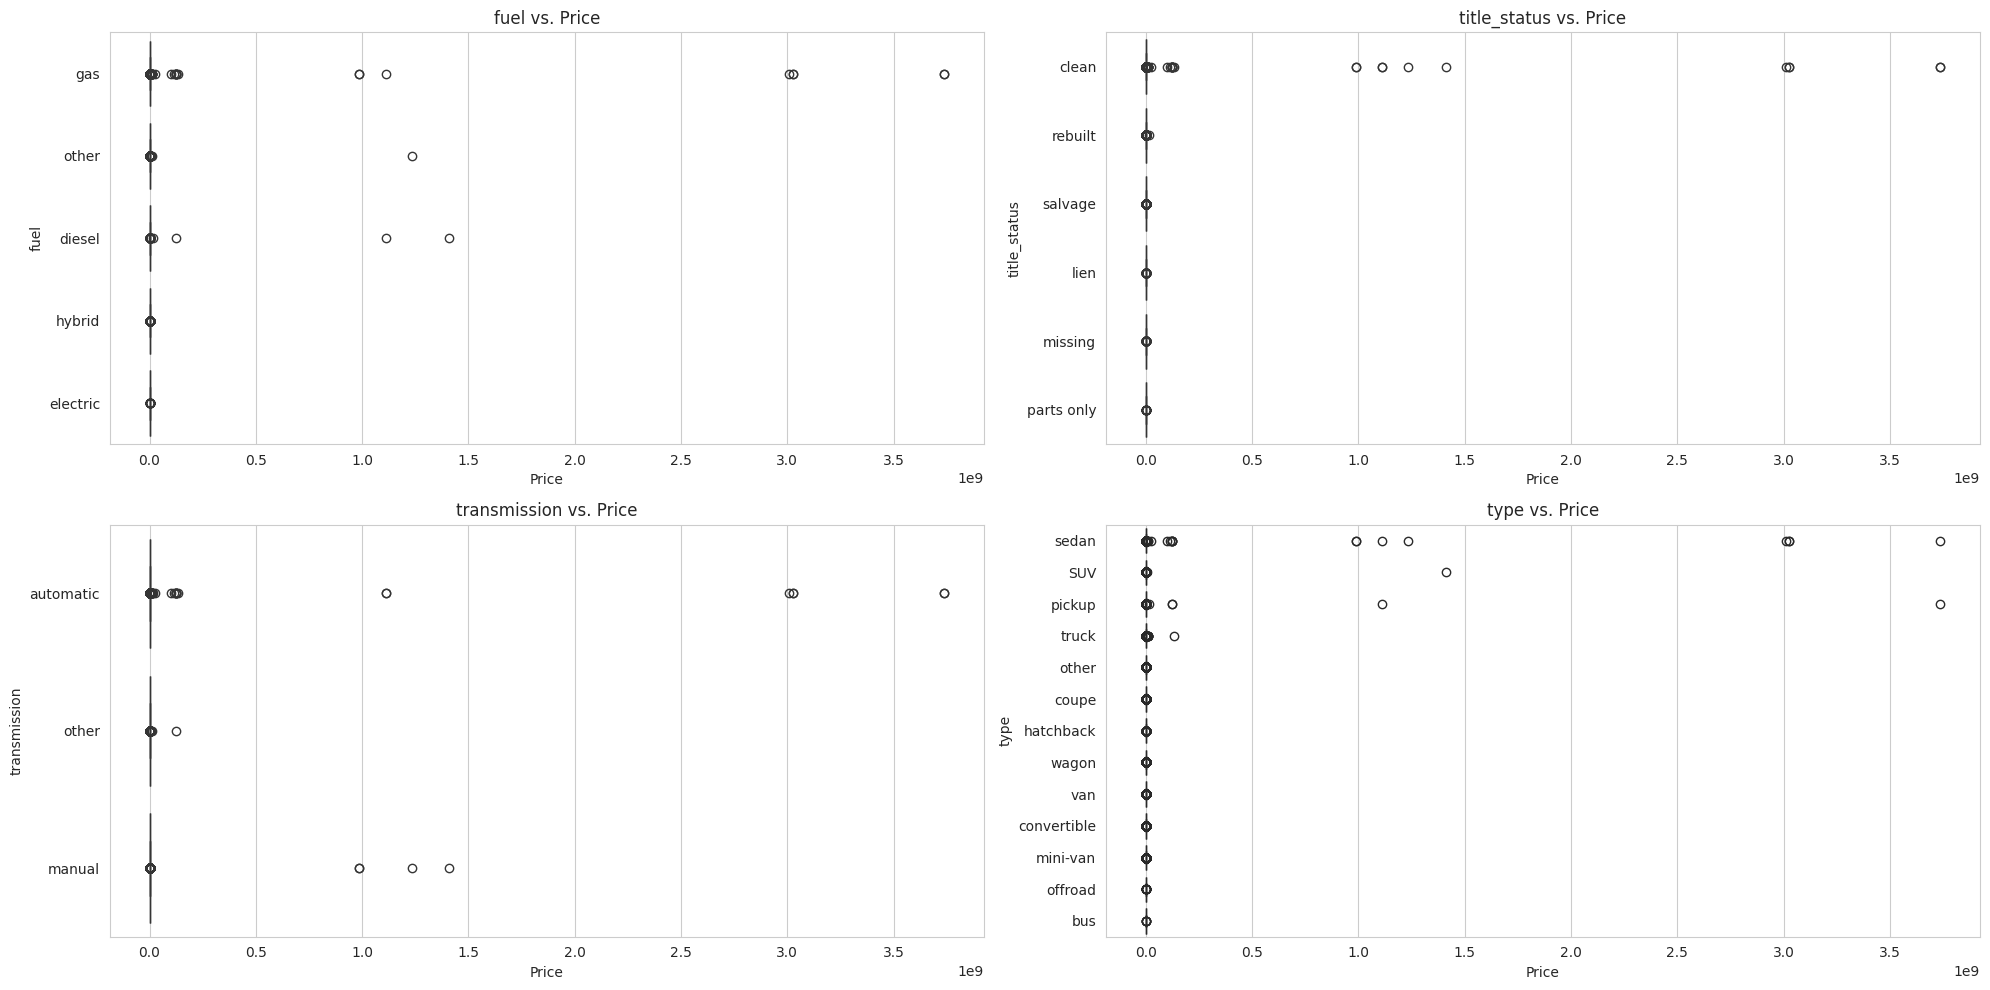

In [33]:
print("Visualizing Relationship between Lower Cardinality Categorical Features and Price:")

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_low_cardinality):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[col], x=df['price'], order=df[col].value_counts().index, palette='viridis')
    plt.title(f'{col} vs. Price')
    plt.xlabel('Price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Visualizing Higher Cardinality Categorical Features (Top 10)

Visualizing Distributions of Higher Cardinality Categorical Features (Top 10):


/tmp/ipython-input-2687889548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_10_values, palette='plasma')
/tmp/ipython-input-2687889548.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df[col], order=top_10_values, palette='plasma')


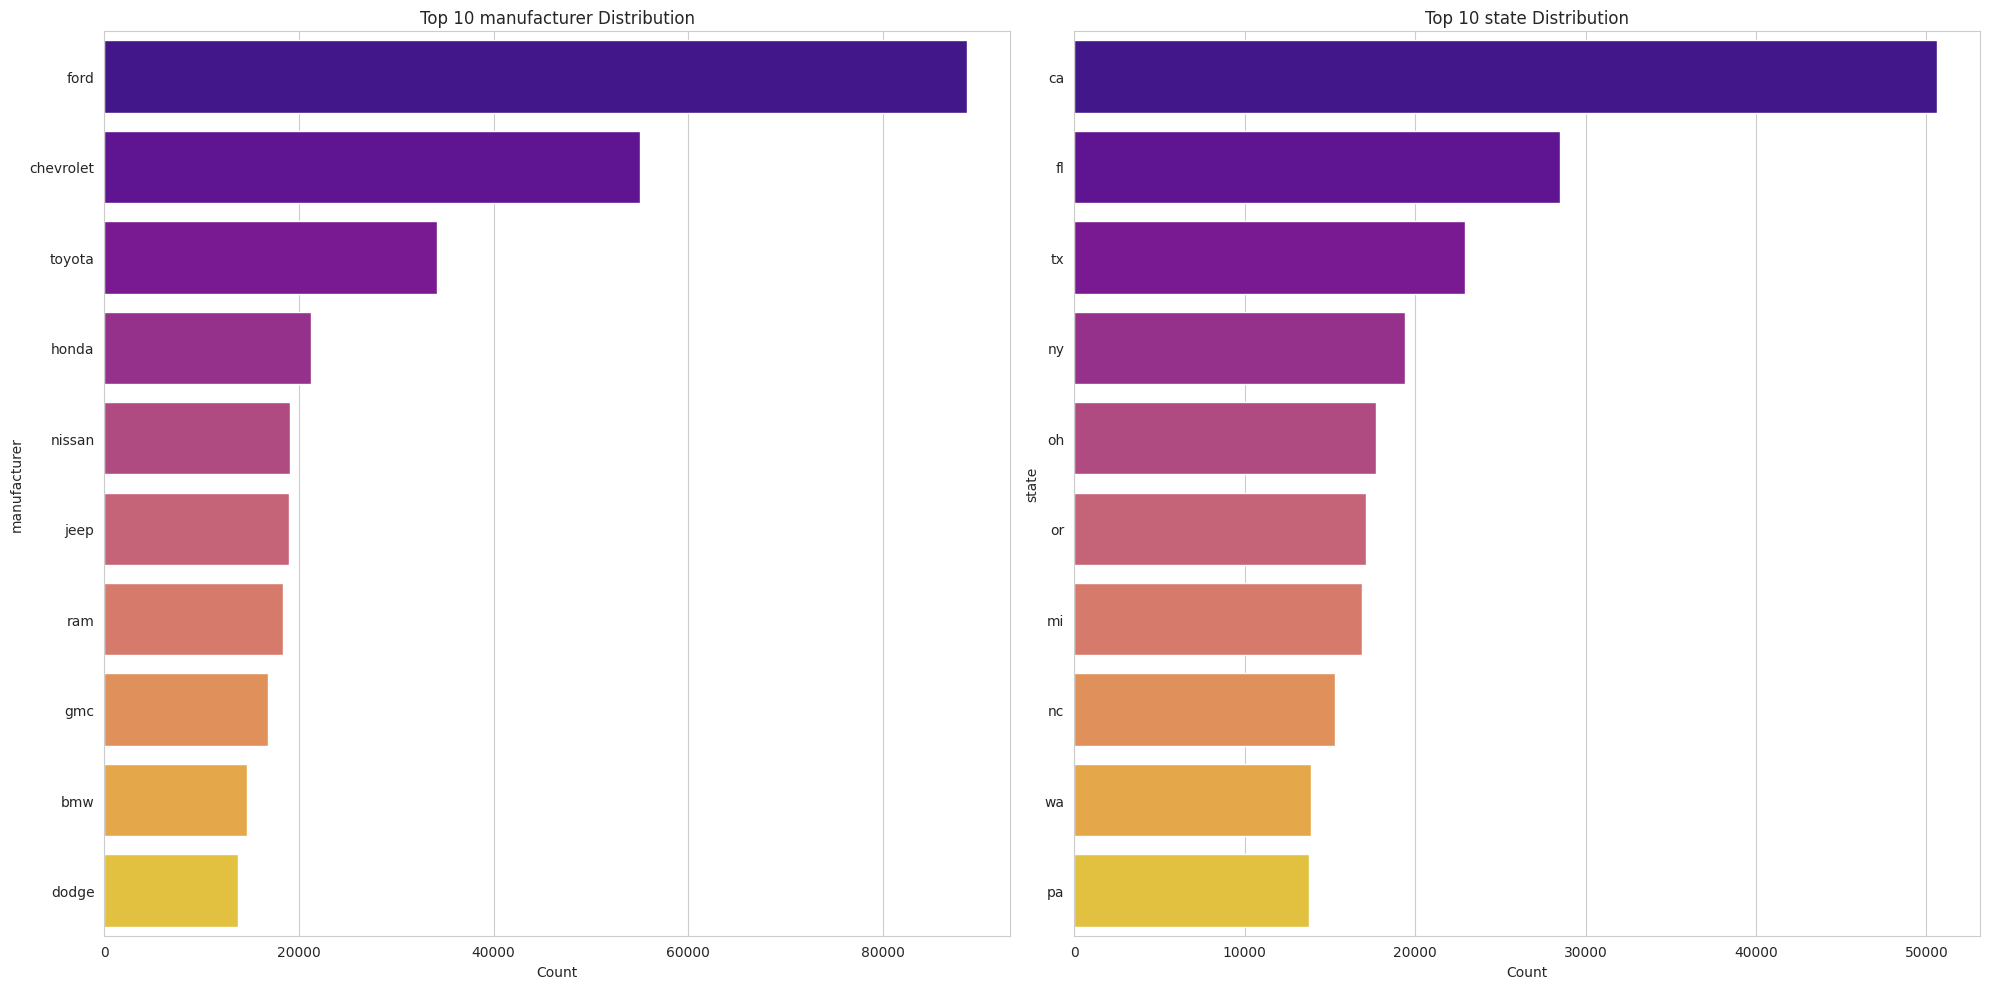

In [34]:
print("Visualizing Distributions of Higher Cardinality Categorical Features (Top 10):")

categorical_high_cardinality = ['manufacturer', 'state']

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_high_cardinality):
    plt.subplot(1, 2, i + 1)
    top_10_values = df[col].value_counts().nlargest(10).index
    sns.countplot(y=df[col], order=top_10_values, palette='plasma')
    plt.title(f'Top 10 {col} Distribution')
    plt.xlabel('Count')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

Visualizing Relationship between Higher Cardinality Categorical Features (Top 10) and Price:


/tmp/ipython-input-16748227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')
/tmp/ipython-input-16748227.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')


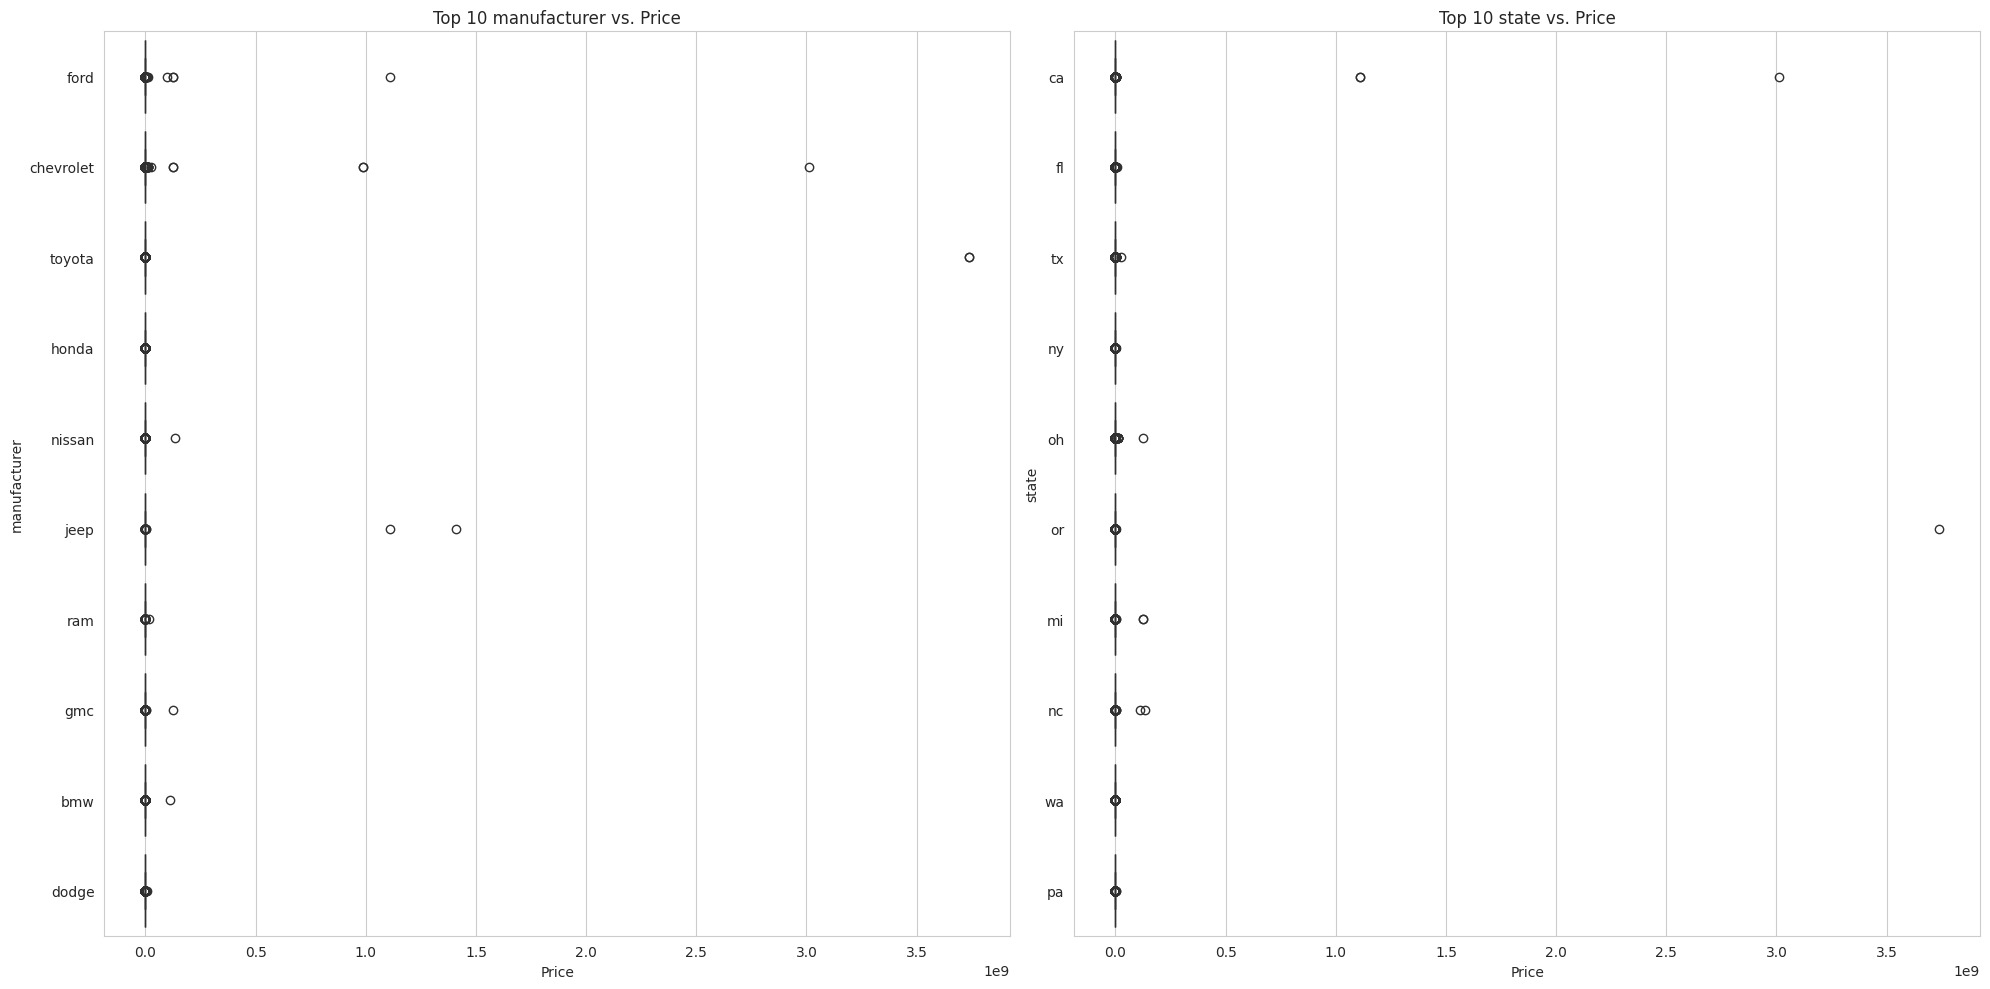

In [35]:
print("Visualizing Relationship between Higher Cardinality Categorical Features (Top 10) and Price:")

plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_high_cardinality):
    plt.subplot(1, 2, i + 1)
    top_10_values = df[col].value_counts().nlargest(10).index
    df_filtered = df[df[col].isin(top_10_values)]
    sns.boxplot(y=df_filtered[col], x=df_filtered['price'], order=top_10_values, palette='plasma')
    plt.title(f'Top 10 {col} vs. Price')
    plt.xlabel('Price')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

### Examining Very High Cardinality Categorical Features

In [36]:
print("Value Counts for Very High Cardinality Categorical Features (first 20 unique values):")

very_high_cardinality = ['region', 'model']

for col in very_high_cardinality:
    print(f"\n--- {col} ---")
    print(df[col].value_counts().head(20))

Value Counts for Very High Cardinality Categorical Features (first 20 unique values):

--- region ---
region
columbus                    3608
jacksonville                3562
spokane / coeur d'alene     2988
eugene                      2985
fresno / madera             2983
orlando                     2983
bend                        2982
omaha / council bluffs      2982
new hampshire               2981
kennewick-pasco-richland    2981
nashville                   2980
salem                       2980
oklahoma city               2979
reno / tahoe                2979
rochester                   2978
boston                      2978
stockton                    2977
sarasota-bradenton          2977
boise                       2976
portland                    2976
Name: count, dtype: int64

--- model ---
model
f-150             13286
silverado 1500     5140
1500               4211
camry              3135
silverado          3023
accord             2969
wrangler           2848
civic           